In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse

In [12]:
import pandas as pd

csv_file_path = 'close.csv'

df = pd.read_csv(csv_file_path, header=None)

close = df[0].tolist()
logclose = np.log(close).tolist()




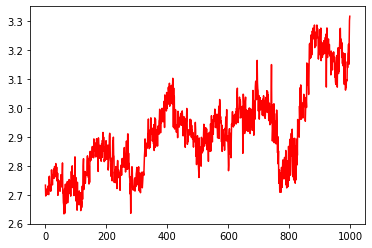

In [13]:
from math import floor

size = len(logclose)-100
close_train, close_test = close[0:size], close[size:len(close)]
logclose_train, logclose_test = logclose[0:size], logclose[size:len(logclose)]

series = logclose
train = logclose_train
test = logclose_test

plt.plot(series , color = 'r')
plt.show()


In [14]:
predicted_list, error_list = [], []
training_data = train

In [15]:
import pandas as pd

csv_file_path = 'forecasted_logclose_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

predicted_list = df[0].tolist()

print(predicted_list)

[3.2078, 3.2309, 3.2216, 3.2184, 3.2322, 3.2488, 3.2197, 3.2236, 3.225, 3.2207, 3.2055, 3.2057, 3.1991, 3.2092, 3.2124, 3.2205, 3.216, 3.207, 3.2075, 3.2181, 3.2284, 3.22, 3.2335, 3.1776, 3.1896, 3.2213, 3.2322, 3.2129, 3.218, 3.2145, 3.224, 3.2157, 3.2066, 3.2122, 3.2063, 3.1979, 3.1963, 3.1921, 3.1656, 3.1776, 3.1642, 3.1615, 3.1632, 3.1529, 3.167, 3.1653, 3.1692, 3.1789, 3.1755, 3.1748, 3.1758, 3.1524, 3.1435, 3.1263, 3.1114, 3.1261, 3.142, 3.1568, 3.1549, 3.1266, 3.1448, 3.1639, 3.1806, 3.1598, 3.1667, 3.1537, 3.1697, 3.1943, 3.2226, 3.2422, 3.2305, 3.2344, 3.2296, 3.2299, 3.2114, 3.2165, 3.1953, 3.195, 3.1785, 3.1701, 3.1662, 3.1457, 3.124, 3.1233, 3.1472, 3.125, 3.1036, 3.095, 3.0872, 3.0916, 3.0948, 3.0953, 3.1191, 3.1272, 3.1496, 3.1657, 3.1859, 3.1745, 3.1973, 3.2354]


In [16]:
for t in range(len(test)):
    predicted_value = predicted_list[t]
    obs = test[t]
    error_list.append(obs - predicted_value)
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=3.207800, expected=3.271051 error=0.063251
predicted=3.230900, expected=3.202381 error=0.028519
predicted=3.221600, expected=3.210279 error=0.011321
predicted=3.218400, expected=3.255555 error=0.037155
predicted=3.232200, expected=3.276956 error=0.044756
predicted=3.248800, expected=3.164039 error=0.084761
predicted=3.219700, expected=3.228549 error=0.008849
predicted=3.223600, expected=3.225494 error=0.001894
predicted=3.225000, expected=3.210561 error=0.014439
predicted=3.220700, expected=3.175467 error=0.045233
predicted=3.205500, expected=3.204006 error=0.001494
predicted=3.205700, expected=3.184657 error=0.021043
predicted=3.199100, expected=3.225573 error=0.026473
predicted=3.209200, expected=3.216152 error=0.006952
predicted=3.212400, expected=3.233173 error=0.020773
predicted=3.220500, expected=3.205588 error=0.014912
predicted=3.216000, expected=3.188375 error=0.027625
predicted=3.207000, expected=3.206196 error=0.000804
predicted=3.207500, expected=3.235340 error=0.

In [17]:
error = mse(test, predicted_list)
print('Test MSE: %.3f' % error)

Test MSE: 0.002


In [18]:
import pandas as pd

csv_file_path = 'rawResiduals_ARIMA_t.csv'

df = pd.read_csv(csv_file_path, header=None)

training_error = np.array(df[0].tolist())

print(training_error)


[-1.5298e-03 -3.9311e-02 -1.3006e-02 -1.1653e-02 -1.4471e-02  9.3608e-03
 -1.0644e-02  8.4813e-03 -1.2014e-02  1.8682e-02 -1.7034e-02 -1.3471e-02
  5.1304e-02  3.5291e-02 -6.6937e-03 -6.9816e-03 -2.5176e-02 -9.5337e-03
 -1.5330e-02 -5.5265e-03  6.3853e-02  1.3319e-02  1.2284e-02 -2.1874e-02
  1.4262e-02  1.3063e-02 -2.9134e-03  2.8957e-02 -3.0832e-03 -1.3177e-02
  3.1001e-02  4.7857e-04  1.7091e-02 -5.0127e-03  2.2891e-02 -3.2433e-02
 -1.0452e-02  1.5019e-02 -3.2515e-02 -2.8845e-02  8.1991e-03 -7.1981e-02
  6.5736e-03 -2.2886e-02  6.6396e-03  3.9180e-03 -4.4601e-03 -2.4622e-02
 -2.5696e-02  1.5648e-02  1.4045e-02  2.7832e-02 -1.5122e-02 -2.0188e-02
  2.1315e-02  1.9706e-02  5.3098e-02 -6.9798e-02 -4.5886e-02 -6.3934e-02
 -4.9847e-02 -6.5052e-02  3.5083e-02  3.1798e-02 -6.5338e-02  5.6268e-02
  3.6506e-02 -4.5097e-02  1.2009e-02 -1.0230e-02  3.6949e-02  2.0499e-02
  2.3158e-02 -5.9164e-02 -1.5642e-02  2.4846e-02 -1.4025e-02  1.8198e-02
  3.3714e-02 -1.3643e-02  2.1978e-02 -3.0665e-02  1

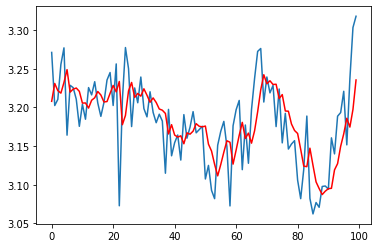

Test MSE: 0.001985


In [19]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()

error = mse(test,predicted_list)
print('Test MSE: %.6f' % error)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [21]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import RobustScaler, RobustScaler
from sklearn.svm import SVR
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import hyperopt
import warnings

training_error = np.array(training_error).reshape(-1,1)

space = {
    "window_size": hp.choice("window_size", range(2,20)),
    "kernel": hp.choice("kernel", ["linear", "poly", "rbf"]),
    "C": hp.loguniform("C", np.log(0.001), np.log(100)),
    "epsilon": hp.loguniform("epsilon", np.log(0.00001), np.log(1)),
    "gamma": hp.choice("gamma", ["scale", "auto"]),
    "degree": hp.quniform("degree", 2, 4, 1),  
    "coef0": hp.uniform("coef0", -5, 5)      
}

def objective(params):
    window_size = params["window_size"]
    kernel = params["kernel"]
    C = params["C"]
    epsilon = params["epsilon"]

    scaler = RobustScaler()

    training_error_scaled = scaler.fit_transform(training_error)
    train_X, train_Y = [], []
    for i in range(len(training_error_scaled) - window_size):
        train_X.append(training_error_scaled[i:i+window_size])
        train_Y.append(training_error_scaled[i+window_size])
    new_train_X = np.array([x.reshape(-1) for x in train_X])
    new_train_Y = np.array(train_Y).ravel()

    svr_params = {"C": C, "epsilon": epsilon}
    
    if kernel == "poly":
        svr_params["gamma"] = params["gamma"]
        svr_params["degree"] = int(params["degree"])  
        svr_params["coef0"] = (params["coef0"])    
    elif kernel == "rbf":
        svr_params["gamma"] = params["gamma"]

    model = SVR(kernel=kernel, **svr_params)

    tscv = TimeSeriesSplit(n_splits=2)
    score = np.mean(cross_val_score(model, new_train_X, new_train_Y, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1))
    
    return {"loss": -score, "status": STATUS_OK}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

best_loss = trials.best_trial['result']['loss']
best_score = best_loss

print("\n------------------------")
print("BEST OVERALL RESULTS:")
print("------------------------")
print("Best parameters (raw indices and values):")
print(best)
print(f"Best score: {best_score:.4f}")


100%|██████████| 100/100 [00:09<00:00, 10.01trial/s, best loss: 0.7216982788481145]

------------------------
BEST OVERALL RESULTS:
------------------------
Best parameters (raw indices and values):
{'C': 0.042415491216658496, 'coef0': 1.9522218229812114, 'degree': 3.0, 'epsilon': 0.050268183973489894, 'gamma': 1, 'kernel': 2, 'window_size': 0}
Best score: 0.7217


In [22]:
from sklearn.preprocessing import RobustScaler, RobustScaler
from sklearn.svm import SVR
import numpy as np

window_sizes = range(2,20)
kernels_list = ["linear", "poly", "rbf"]
gamma_list = ["scale", "auto"]

window_size = window_sizes[best["window_size"]]
best_kernel = kernels_list[best["kernel"]]
best_gamma = gamma_list[best["gamma"]]
best_C = best["C"]
best_epsilon = best["epsilon"]
best_degree = int(best["degree"]) if best_kernel == "poly" else None
best_coef0 = (best["coef0"]) if best_kernel == "poly" else None

scaler = RobustScaler()

training_error_scaled = scaler.fit_transform(training_error)
train_X, train_Y = [], []
for i in range(0, len(training_error_scaled) - window_size):
    train_X.append(training_error_scaled[i:i+window_size])
    train_Y.append(training_error_scaled[i+window_size])

new_train_X = np.array([x.reshape(-1) for x in train_X])
new_train_Y = np.array(train_Y).ravel()

svr_params = {"C": best_C, "epsilon": best_epsilon}
if best_kernel == "poly":
    svr_params["gamma"] = best_gamma
    svr_params["degree"] = best_degree
    svr_params["coef0"] = best_coef0
elif best_kernel == "rbf":
    svr_params["gamma"] = best_gamma

model = SVR(kernel=best_kernel, **svr_params)

model.fit(new_train_X, new_train_Y)


SVR(C=0.042415491216658496, epsilon=0.050268183973489894, gamma='auto')

In [23]:
print(window_size)
print(best_kernel)
print(best_gamma)
print(best_C)
print(best_epsilon)
print(best_degree)
print(best_coef0)

2
rbf
auto
0.042415491216658496
0.050268183973489894
None
None


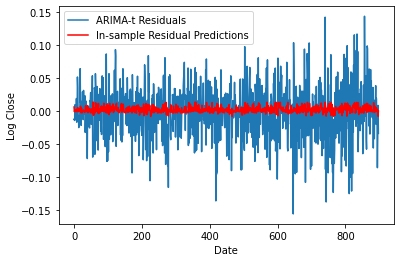

Train MSE: 0.001626


In [24]:
predictions = model.predict(new_train_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))
Y = pd.DataFrame(training_error[window_size:])
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y, label='ARIMA-t Residuals')
plt.plot(pred , color = 'r', label='In-sample Residual Predictions')
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()
error = mse(training_error[window_size:],predictions_rescaled)
print('Train MSE: %.6f' % error)

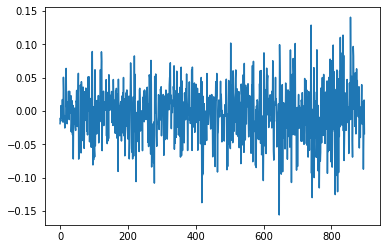

In [25]:
rawResiduals_ARIMA_t_SVR = Y - pred
plt.plot(rawResiduals_ARIMA_t_SVR)
plt.show()

rawResiduals_ARIMA_t_SVR.to_csv('rawResiduals_ARIMA_t_SVR_BO-TPE_robustscaler.csv', index=False)

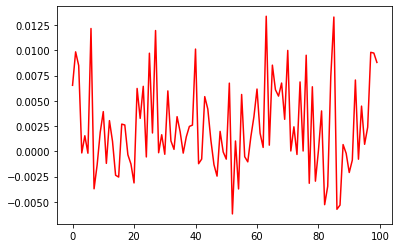

Test MSE: 0.001937


In [26]:
test_extended = training_error.tolist()[-1*window_size:] + error_list
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
        
test_data = np.array(test_data).reshape(-1,1)
test_scaled = scaler.transform(test_data)

test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)
predictions_rescaled=scaler.inverse_transform(predictions.reshape(-1, 1))


Y = pd.DataFrame(error_list)
pred = pd.DataFrame(predictions_rescaled)

plt.plot(predictions_rescaled , color = 'r')
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

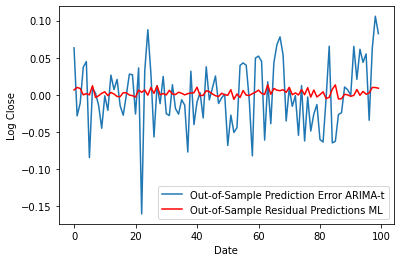

Test MSE: 0.001937


In [27]:
plt.plot(Y, label='Out-of-Sample Prediction Error ARIMA-t')
plt.plot(pred , color = 'r', label='Out-of-Sample Residual Predictions ML')
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()
error = mse(error_list,predictions_rescaled)
print('Test MSE: %.6f' % error)

Hybrid Test MSE: 0.001937


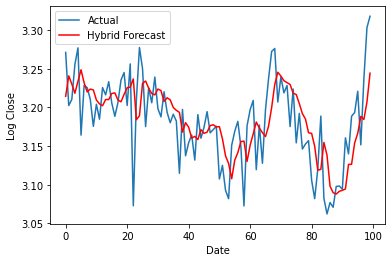

In [28]:
predicted_array = np.array(predicted_list)
final_pred = predicted_array+predictions_rescaled.flatten()
hybrid_error = mse(np.array(test), final_pred)
print('Hybrid Test MSE: %.6f' % hybrid_error)

plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(pd.DataFrame(final_pred), color='r', label="Hybrid Forecast")
plt.xlabel('Date')  
plt.ylabel('Log Close')  
plt.legend()
plt.show()

In [29]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on logclose: ")
print(compute_error_metrics(test, final_pred))
print(compute_directional_metrics(test, final_pred))


Errors on logclose: 
{'NMSE': 0.6309433923950669, 'MAE': 0.03457799499079201, 'RMSE': 0.04400640768981506, 'MSE': 0.0019365639177622135, 'MAPE': 1.0891899468278154, 'TheilsU': 0.8737771147464359}
{'DA': 0.6565656565656566, 'DS': 0.40404040404040403, 'CU': 0.38181818181818183, 'CD': 0.4318181818181818}


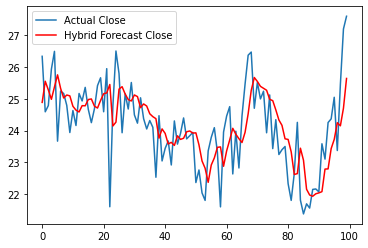

Test MSE: 1.120585


In [30]:
close_pred = np.exp(final_pred)
Y = pd.DataFrame(close_test)
pred = pd.DataFrame(close_pred)
plt.plot(Y, label="Actual Close")
plt.plot(pred , color = 'r', label="Hybrid Forecast Close")
plt.legend()
plt.show()

error = mse(close_test,close_pred)
print('Test MSE: %.6f' % error)

In [31]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from forecast_metrics import compute_error_metrics, compute_directional_metrics
print("Errors on close: ")
print(compute_error_metrics(close_test, close_pred))
print(compute_directional_metrics(close_test, close_pred))

Errors on close: 
{'NMSE': 0.6331385500720178, 'MAE': 0.8330361907423846, 'RMSE': 1.0585770063638873, 'MSE': 1.1205852784023294, 'MAPE': 3.47602701932582, 'TheilsU': 0.8686806297037671}
{'DA': 0.6565656565656566, 'DS': 0.40404040404040403, 'CU': 0.38181818181818183, 'CD': 0.4318181818181818}


Stock: 26.339 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 26339.0
Stock: 24.591 Action: Buy Portfolio: 26336.96 Stocks: 1071 Balance_init: 2 total($) 26338.96
Stock: 24.786 Action: Bought--Holding Portfolio: 26545.81 Stocks: 1071 Balance_init: 2 total($) 26547.81
Stock: 25.934 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27777.31
Stock: 26.495 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 27777.31
Stock: 23.666 Action: Buy Portfolio: 27760.22 Stocks: 1173 Balance_init: 17 total($) 27777.22
Stock: 25.243 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29627.04
Stock: 25.166 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 29627.04
Stock: 24.793 Action: Buy Portfolio: 29602.84 Stocks: 1194 Balance_init: 24 total($) 29626.84
Stock: 23.938 Action: Bought--Holding Portfolio: 28581.97 Stocks: 1194 Balance_init: 24 total($) 28605.97
Stock: 24.6

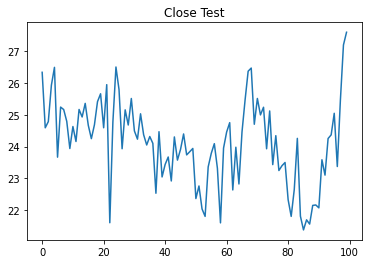

Final value of stock:
27601.0


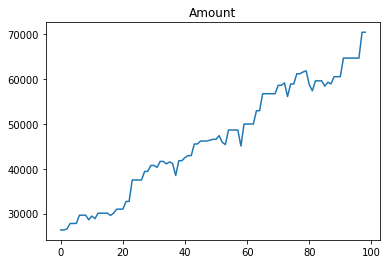

Final value of portfolio:
70475.0
TS=
2.5533495163218722


In [ ]:
import sys
sys.path.append('../Functions/Performance Metrics/')
from trading_strategies import trading_strategy1

trading_strategy1(close_test, close_pred)
            